In [1]:
import numpy as np
import os
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.9
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)
        
    def _convert_state(self, s):
        return np.where(s == self.agent_indicator)[0][0]
        
    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        
        q_value = self.q_values[state][action]
        ################## updated code ################################
        next_q_value = max(self.q_values[next_state])
        
        td_error = reward + self.gamma * next_q_value - q_value
        self.q_values[state][action] = q_value + self.alpha * td_error
        ##############################################################
    
    def act(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        return action

In [3]:
from utils import gen_wrapped_env, show_video

In [4]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)

## For Q-Learning
+ Q-learning update

In [5]:
rewards = []
for ep in range(20000):
    done = False
    obs = env.reset()
    action = agent.act(obs)
    
    ep_rewards = 0
    while not done:
        next_obs, reward, done, info = env.step(action)

        next_action = agent.act(next_obs)

        agent.update(obs, action, reward, next_obs, next_action)
        
        ep_rewards += reward
        obs = next_obs
        action = next_action
    rewards.append(ep_rewards)
    if (ep+1) % 100 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
env.close()

episode: 100, rewards: 0
episode: 200, rewards: 0
episode: 300, rewards: 0
episode: 400, rewards: 0
episode: 500, rewards: 0
episode: 600, rewards: 0
episode: 700, rewards: 0
episode: 800, rewards: 0
episode: 900, rewards: 0
episode: 1000, rewards: 0
episode: 1100, rewards: 0
episode: 1200, rewards: 0
episode: 1300, rewards: 0
episode: 1400, rewards: 0
episode: 1500, rewards: 0
episode: 1600, rewards: 0
episode: 1700, rewards: 0
episode: 1800, rewards: 0
episode: 1900, rewards: 0
episode: 2000, rewards: 0
episode: 2100, rewards: 0.532
episode: 2200, rewards: 0.37
episode: 2300, rewards: 0.22599999999999998
episode: 2400, rewards: 0.33399999999999996
episode: 2500, rewards: 0.838
episode: 2600, rewards: 0
episode: 2700, rewards: 0.802
episode: 2800, rewards: 0.6579999999999999
episode: 2900, rewards: 0
episode: 3000, rewards: 0
episode: 3100, rewards: 0.712
episode: 3200, rewards: 0.244
episode: 3300, rewards: 0
episode: 3400, rewards: 0.532
episode: 3500, rewards: 0
episode: 3600, rewa

In [6]:
{s:np.round(q, 5).tolist() for s, q in agent.q_values.items()}

{0: [0.03447, 0.03451, 0.03786],
 3: [0.03251, 0.03271, 0.03475],
 15: [0.07905, 0.08026, 0.10268],
 12: [0.06, 0.06024, 0.06588],
 6: [0.03618, 0.03629, 0.03949],
 18: [0.10198, 0.10535, 0.13418],
 30: [0.21575, 0.20646, 0.27543],
 21: [0.15249, 0.15372, 0.18345],
 24: [0.08015, 0.08041, 0.09318],
 27: [0.16645, 0.17083, 0.2148],
 39: [0.35771, 0.35745, 0.39551],
 36: [0.09868, 0.10111, 0.12732],
 42: [0.46586, 0.46597, 0.52703],
 9: [0.04243, 0.04221, 0.04586],
 33: [0.29472, 0.29603, 0.30868],
 45: [0.0, 0.0, 0.0]}

In [7]:
show_video()

In [8]:
os.makedirs('./logs', exist_ok=True)
pd.Series(rewards).to_csv('./logs/rewards_qlearning_empty.csv')

In [11]:
sarsa_logs = pd.read_csv('./logs/rewards_sarsa_empty.csv', index_col=False).iloc[:, 1]
q_logs = pd.read_csv('./logs/rewards_qlearning_empty.csv', index_col=False).iloc[:, 1]

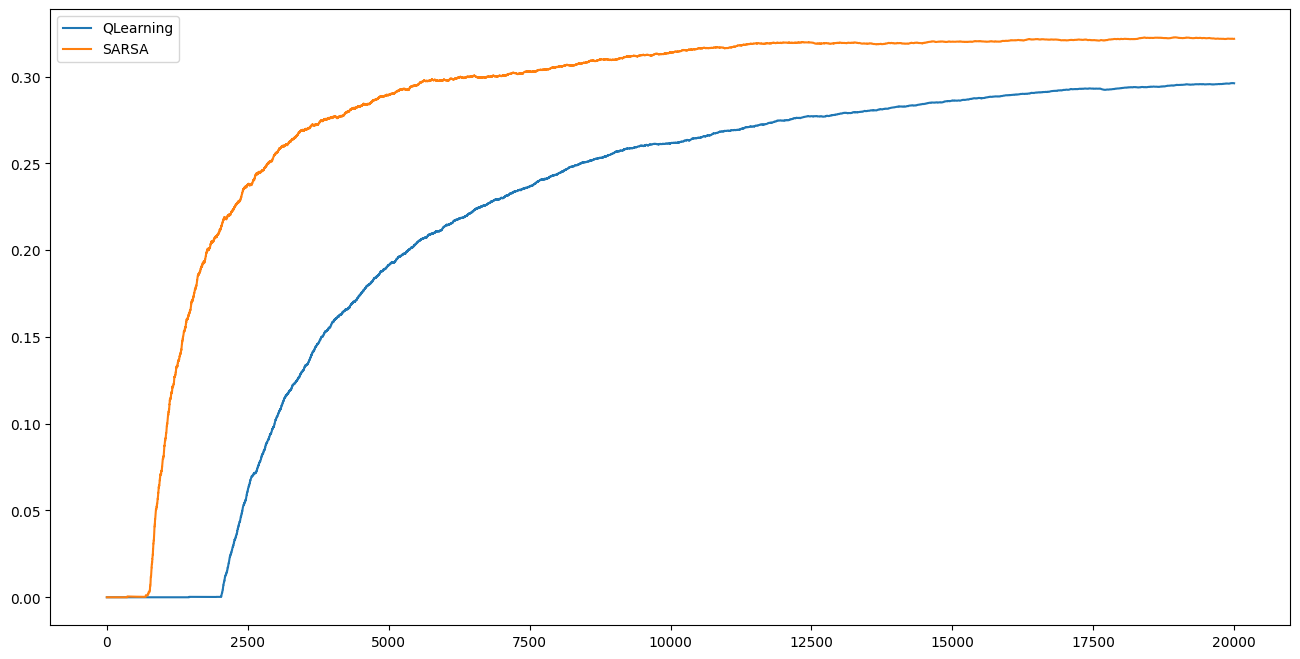

In [12]:
plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning")
plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.legend()